<a href="https://colab.research.google.com/github/Shigitora/My_First_Test_Repo/blob/main/%D0%9B%D0%B0%D0%B1_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def create_url(date):
  url_begin = "https://www.so-ups.ru/functioning/ees/ees-indicators/ees-gen-consump-hour/?tx_mscdugraph_pi%5Bcontroller%5D=Graph&tx_mscdugraph_pi%5Baction%5D=fullview&tx_mscdugraph_pi%5BviewDate%5D="
  url_end = "&tx_mscdugraph_pi%5BviewKpo%5D=1019"
  return url_begin + date + url_end

def parse_consumption(date):
  url = create_url(date)
  soup = BeautifulSoup(requests.get(url).content, 'html.parser')
  full_txt = str(soup)
  text_list_datetime = full_txt[full_txt.find('data-datax=') + len('data-datax=') + 1 : full_txt.find('data-datay=') - 2].split(',')
  text_list_consumption = full_txt[full_txt.find('data-datay=') + len('data-datay=') + 1 : full_txt.find('data-datay1=') - 2].split(',')
  text_list_generation = full_txt[full_txt.find('data-datay1=') + len('data-datay1=') + 1 : full_txt.find('data-date=') - 2].split(',')
  df = pd.DataFrame([text_list_datetime, list(map(int, text_list_generation)), list(map(int, text_list_consumption))])
  return df.T

In [ ]:
df_power = parse_consumption('2022-05-29')
df_power = df_power.append(parse_consumption('2022-05-29'))
df_power = df_power.append(parse_consumption('2022-05-29'))
df_power

,0,1,2
0,2022-05-29 0:00,104526,104247
1,2022-05-29 1:00,102027,101838
2,2022-05-29 2:00,100784,100433
3,2022-05-29 3:00,99948,99744
4,2022-05-29 4:00,98917,99035
...,...,...,...
19,2022-05-29 19:00,113380,111971
20,2022-05-29 20:00,112009,111475
21,2022-05-29 21:00,113953,112760
22,2022-05-29 22:00,111468,110643


In [ ]:
# 5. Переименуем столбцы
df_power_2 = df_power.copy()

df_power_2.columns = ['Время', 'Генерация (МВт)', 'Потребление (МВт)']

# Установим время в качестве метки строки
df_power_2 = df_power_2.set_index('Время')

# Явно укажем, что данные - целые числа
df_power_2['Генерация (МВт)'] = df_power_2['Генерация (МВт)'].astype('int')
df_power_2['Потребление (МВт)'] = df_power_2['Потребление (МВт)'].astype('int')

# Определим разность генерации и потребления
df_power_2['Разность (МВт)'] = df_power_2['Генерация (МВт)'] - df_power_2['Потребление (МВт)'] 

df_power_2

,Генерация (МВт),Потребление (МВт),Разность (МВт)
Время,,,
2022-05-29 0:00,104526,104247,279
2022-05-29 1:00,102027,101838,189
2022-05-29 2:00,100784,100433,351
2022-05-29 3:00,99948,99744,204
2022-05-29 4:00,98917,99035,-118
...,...,...,...
2022-05-29 19:00,113380,111971,1409
2022-05-29 20:00,112009,111475,534
2022-05-29 21:00,113953,112760,1193


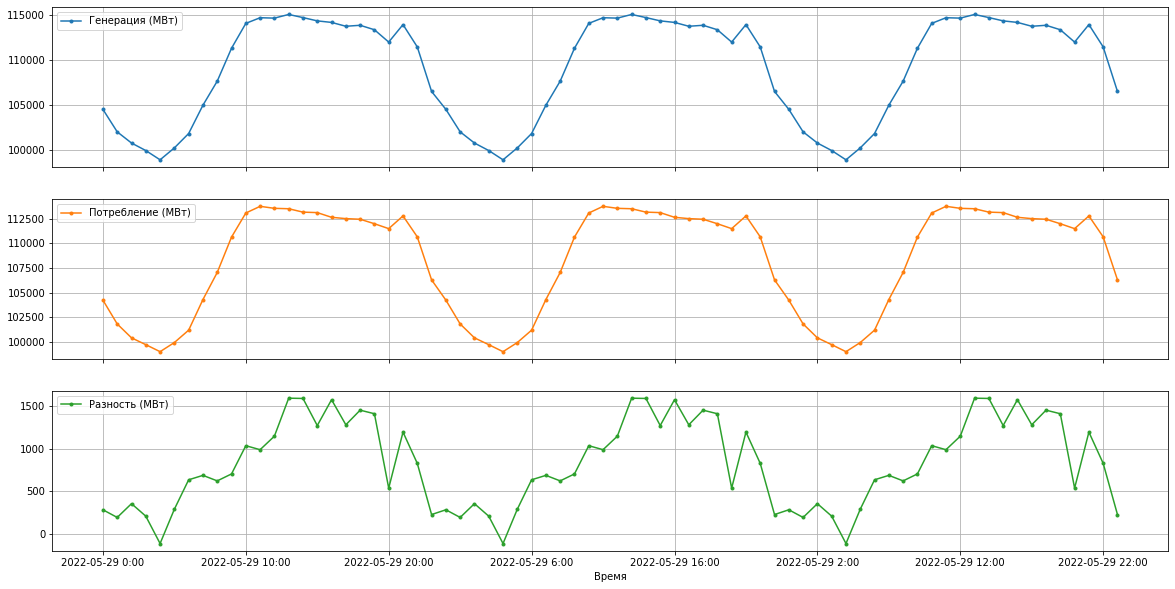

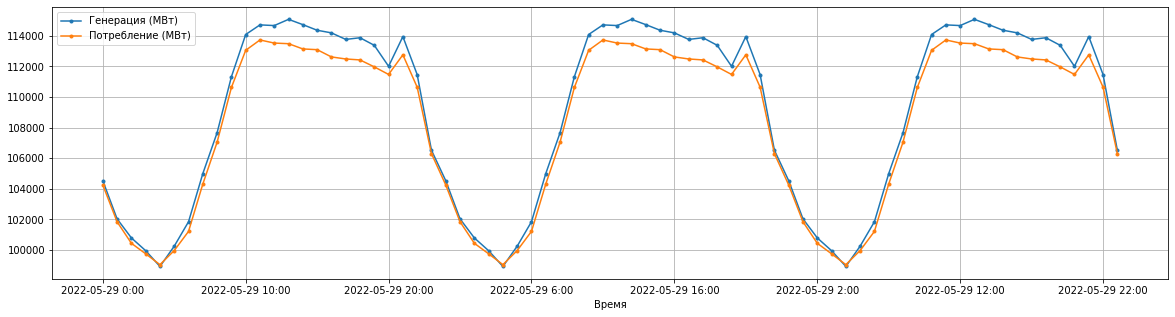

In [ ]:
import matplotlib.pyplot as plt

axes = df_power_2.plot(marker='.', figsize=(20, 10), subplots = True)

for _ in axes:
  _.grid(True)

axes = df_power_2[df_power_2.columns[: -1]].plot(marker='.', figsize=(20, 5), subplots = False)
axes.grid(True)

In [ ]:
#Сортировка по Потреблению 
df_exted = df_power_2.sort_values(['Потребление (МВт)'])
print(df_exted)
print()

                  Генерация (МВт)  Потребление (МВт)  Разность (МВт)
Время                                                               
2022-05-29 4:00             98917              99035            -118
2022-05-29 4:00             98917              99035            -118
2022-05-29 4:00             98917              99035            -118
2022-05-29 3:00             99948              99744             204
2022-05-29 3:00             99948              99744             204
...                           ...                ...             ...
2022-05-29 12:00           114673             113528            1145
2022-05-29 12:00           114673             113528            1145
2022-05-29 11:00           114717             113731             986
2022-05-29 11:00           114717             113731             986
2022-05-29 11:00           114717             113731             986

[72 rows x 3 columns]



In [ ]:
# 7.3. Через iloc по номерам строк и столбцов, номера идут с нуля
print('данные из первой строки и второго столбца')
print(df_power_2.iloc[1 , 2])
print()
print('данные из всех строк кроме двух последних и из столбцов со второго по четвертый включительно')
print(df_power_2.iloc[: -2, 2 : 5])
print()


данные из первой строки и второго столбца
189

данные из всех строк кроме двух последних и из столбцов со второго по четвертый включительно
                  Разность (МВт)
Время                           
2022-05-29 0:00              279
2022-05-29 1:00              189
2022-05-29 2:00              351
2022-05-29 3:00              204
2022-05-29 4:00             -118
...                          ...
2022-05-29 17:00            1279
2022-05-29 18:00            1451
2022-05-29 19:00            1409
2022-05-29 20:00             534
2022-05-29 21:00            1193

[70 rows x 1 columns]



In [ ]:
print(df_power_2[df_power_2['Потребление (МВт)'] > 110000.])
print() 

                  Генерация (МВт)  Потребление (МВт)  Разность (МВт)
Время                                                               
2022-05-29 9:00            111323             110622             701
2022-05-29 10:00           114088             113055            1033
2022-05-29 11:00           114717             113731             986
2022-05-29 12:00           114673             113528            1145
2022-05-29 13:00           115079             113487            1592
2022-05-29 14:00           114733             113144            1589
2022-05-29 15:00           114366             113096            1270
2022-05-29 16:00           114195             112621            1574
2022-05-29 17:00           113767             112488            1279
2022-05-29 18:00           113876             112425            1451
2022-05-29 19:00           113380             111971            1409
2022-05-29 20:00           112009             111475             534
2022-05-29 21:00           113953 

In [ ]:
# Максимальная мощность
print(df_power_2.groupby(['Потребление (МВт)']).max())
print()

                   Генерация (МВт)  Разность (МВт)
Потребление (МВт)                                 
99035                        98917            -118
99744                        99948             204
99958                       100244             286
100433                      100784             351
101210                      101842             632
101838                      102027             189
104247                      104526             279
104307                      104991             684
106297                      106520             223
107047                      107666             619
110622                      111323             701
110643                      111468             825
111475                      112009             534
111971                      113380            1409
112425                      113876            1451
112488                      113767            1279
112621                      114195            1574
112760                      113

In [ ]:
# Число электростанций по мощности выше 100000 МВт 
print(df_power_2.groupby([df_power_2['Потребление (МВт)'] > 100000])['Потребление (МВт)'].count())
print()

Потребление (МВт)
False     9
True     63
Name: Потребление (МВт), dtype: int64



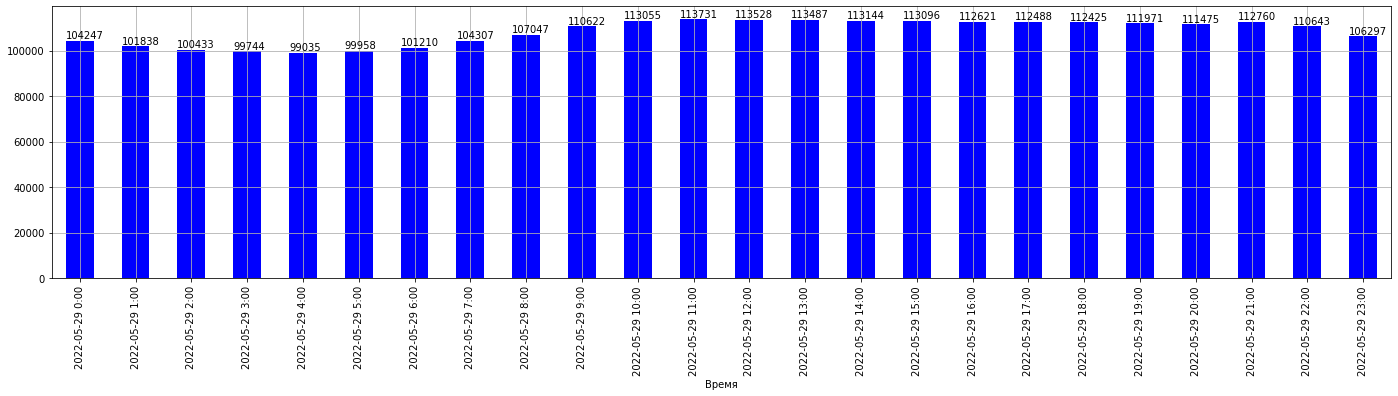

In [ ]:
# 7. Гистограмма
axes = df_power_2.iloc[ : 24, 1].plot(kind = 'bar', figsize=(24, 5), color = 'blue')
for p in axes.patches:
  axes.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

axes.grid(True)

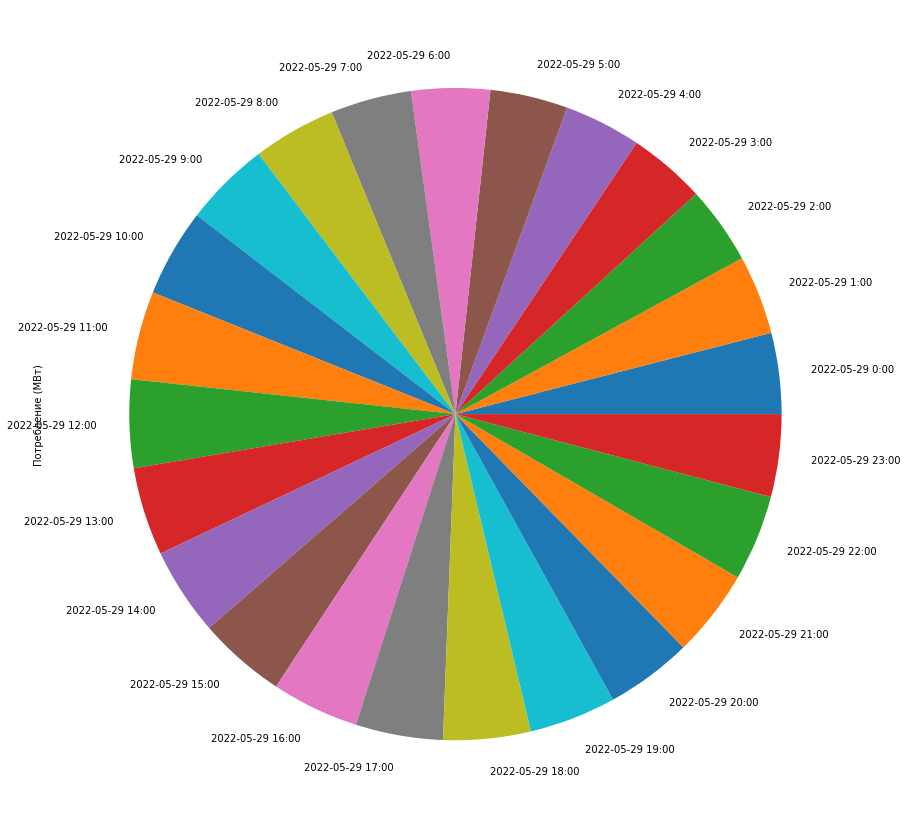

In [ ]:
axes = df_power_2.iloc[ : 24, 1].plot(kind = 'pie', figsize=(60, 15))

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

In [ ]:
p = figure(plot_width = 1500, plot_height = 700)

p.line(np.arange(len(df_power_2.index)),df_power_2['Потребление (МВт)'], line_width = 2, legend_label = 'Потребление')
p.line(np.arange(len(df_power_2.index)),df_power_2['Генерация (МВт)'], line_width = 2, color = 'red' ,  legend_label = 'Генерация')
p.xaxis.axis_label = 'Время (ч)'
p.yaxis.axis_label = 'Мощность (МВт)'
show(p)